In [3]:
import warnings
#warnings.simplefilter(action="ignore", category=FutureWarning)

# keras imports
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.applications.vgg19 import VGG19, preprocess_input
from keras.applications.xception import Xception, preprocess_input
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.applications.inception_v3 import InceptionV3, preprocess_input
#from keras.applications  #import InceptionResNetV2, preprocess_input
from keras.preprocessing import image
from keras.models import Model
from keras.models import model_from_json
from keras.models import Input
# other imports
#from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
#import glob
#import cv2
import h5py
import os
import json
import pickle
#import datetime
import time

Using TensorFlow backend.


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import os
import numpy as np

In [34]:
models = {
    'vgg16': {'image_size': (224,224), 'model':VGG16,'layer':'block5_pool','den_layer':'fc1'},
    'vgg19': {'image_size': (224,224),'model':VGG19, 'layer':'block5_pool','den_layer':'flatten_1'},
    'resnet50': {'image_size': (224,224),'model':ResNet50, 'layer':'avg_pool','den_layer':'fc1'},
    'inceptionv3': {'image_size': (299,299),'model':InceptionV3, 'layer':'mixed10','den_layer':'avg_pool'},
    'xception' :{'image_size':(299,299),'model':Xception, 'layer':'block14_sepconv2_act','den_layer':'avg_pool'},
}

def get_base_model(model_name = 'vgg16', weights ='imagenet', image_size=None, verbose = False):
    """Obtain one of the pretrain model from keras
    
    Args:
        model_name: str, includes ['vgg16', 'vgg19','xception','resnet50','inceptionv3']
        weights: str, 'imagenet'(default) or None; when None, then train NN from scratch.
        image_size: tuple, (width,height) of image size for base_model.
        verbose: bool, if True, show keras model name and model summary
    
    Returns:
        base_model: keras model class or None 
    
    """
    
    if model_name not in models_args:
        print('Please select model name from one of these {}'.format(model_names.keys))
        return None 
    else:
        print('model name is:', model_name)
    if image_size is None:
        image_size = models_args[model_name]['image_size'] 
        if verbose:
            print('Using default imge size',image_size)
    
    input_tensor = Input(shape=(image_size[0], image_size[1], 3)) # width * height * n_channels 
    base_model = models[model_name]['model'](input_tensor = input_tensor, weights=weights, include_top = True) 
        
    if verbose:
        if base_model is not None:
            print('model summary:', base_model.summary())
        else:
            print('base_model is None')
    print('non-dens layer: {},  den_layer: {}'.format(models[model_name]['layer'],models[model_name]['den_layer']))    
    return base_model

def get_model_by_layer(base_model, layer_name):
    """
    Args:
        base_model: keras model, 
        layer_name: str, the name of the layer
    
    Returns:
        model, keras model 
    """
    model = Model(input=base_model.input, output=base_model.get_layer(layer_name).output)
    return model 

def convert_img_to_feature(img_path, model=None, image_size=(224,224)):
    """Using keras pre-train model to extract features from images
    
    Args:
        img_path: str, the file path for the image
        model, keras pre-train model
        image_size, tuple, (width, height), this needed to be equals to image_size of pre-train model
        
    """
    
    if model is None:
        print('Error, the model is None')
        return None
    
    img = image.load_img(img_path, target_size=image_size) 
    x = image.img_to_array(img) # output to numpy array
    x = np.expand_dims(x, axis=0) # insert a new dimension at axis=0
    x = preprocess_input(x) # pre-process 4D tensor, normalization
    
    # extract image feature by keras model
    feature = model.predict(x) 
    feature = feature.flatten() # flatten the feature to 1D array
    
    return feature

In [36]:
base_model = get_base_model(model_name = 'vgg16', verbose=True)

model name is: vgg16
Using default imge size (224, 224)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPool

In [6]:
model = get_model(base_model, layer_name='fc1')

C:\Users\hj5446\Dropbox\F Disk\1Research\1_Experiement\1_fracture_recognition\git\fracture_detection\feature_extractor.py:24: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("fc...)`
  model = Model(input=base_model.input, output=base_model.get_layer(layer_name).output)


In [10]:
train_path = 'dataset/flowers_17'
img_path = 'dataset/flowers_17/image_0001.jpg'
features = [] # store feature data, x
labels   = [] # store label data, y
verbose = True
# path to training dataset
train_files = os.listdir(train_path)
label = 0

for i, file in enumerate(train_files):
    if i > 240:
        break
    if verbose:
        if i %10 == 0:
            print(' {}'.format(i), end=',')
        if (i) % 80 == 0 :
            label = label+1
            print('\n file {}, label {}'.format(file, label))
            
    img_path = train_path + "/" + file   
    feature = convert_img_to_feature(img_path, model)
    features.append(feature)
    labels.append(label)

#plot_model(base_model)

 0,
 file image_0001.jpg, label 1
 10, 20, 30, 40, 50, 60, 70, 80,
 file image_0081.jpg, label 2
 90, 100, 110, 120, 130, 140, 150, 160,
 file image_0161.jpg, label 3
 170, 180, 190, 200, 210, 220, 230, 240,
 file image_0241.jpg, label 4


In [13]:
seed = 9
features_np = np.array(features)
labels_np = np.array(labels)
(trainData, testData, trainLabels, testLabels) = train_test_split(features_np,
                                                                  labels_np,
                                                                  test_size=0.1, #test_size,
                                                                  random_state=seed)
model_LR = LogisticRegression(random_state=seed)
model_LR.fit(trainData, trainLabels)
testLabels_pre = model_LR.predict(testData)
score_LR = accuracy_score(testLabels, testLabels_pre)
score_LR

0.83999999999999997

In [3]:
# filter warnings
# load the user configs
with open('conf/conf_vgg16.json') as f:    #resnet50
    config = json.load(f)
# config variables
model_name = config["model"]
weights = config["weights"]
include_top = config["include_top"]
train_path = config["train_path"]
features_path = config["features_path"]
labels_path = config["labels_path"]
test_size = config["test_size"]
results = config["results"]
model_path = config["model_path"]
#weights_path = config["weights_path"]
print('model_name {}. features_path {}'.format(model_name, features_path))

model_name vgg16. features_path output/flowers_17/vgg16/features.h5


In [40]:
feature.shape

(4096,)

In [3]:
# start time
#print("[STATUS] start time - {}".format(datetime.datetime.now().strftime("%Y-%m-%d %H:%M")))
#start = time.time()

# create the pretrained models
# check for pretrained weight usage or not
# check for top layers to be included or not

# select  
if model_name == "vgg16":
    # input width > 48
    base_model = VGG16(weights=weights) # creat the VGG16 architecture model, include_top, the last (1-3) ANN layers
    model = Model(input=base_model.input, output=base_model.get_layer('fc1').output)
    image_size = (224, 224)
elif model_name == "vgg19":
    base_model = VGG19(weights=weights)
    model = Model(input=base_model.input, output=base_model.get_layer('fc1').output)
    image_size = (224, 224)
elif model_name == "resnet50":
    base_model = ResNet50(weights=weights)
    model = Model(input=base_model.input, output=base_model.get_layer('flatten_1').output) #Flatten
    image_size = (224, 224)
elif model_name == "inceptionv3":
    base_model = InceptionV3(weights=weights)
    model = Model(input=base_model.input, output=base_model.get_layer('avg_pool').output) # this is correct
    #model = Model(input=base_model.input, output=base_model.get_layer('Dense').output)
    image_size = (299, 299)
elif model_name == "xception":
    base_model = Xception(weights=weights)
    model = Model(input=base_model.input, output=base_model.get_layer('avg_pool').output)
    image_size = (299, 299)
elif model_name == "InceptionResNetV2":
    base_model = Xception(weights=weights)
    model = Model(input=base_model.input, output=base_model.get_layer('avg_pool').output)
    image_size = (299, 299)
else:
    base_model = None

print("[INFO] successfully loaded base model and model...")

[INFO] successfully loaded base model and model...


C:\Users\hj5446\AppData\Local\Continuum\Anaconda3\envs\frac_detect\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("fl...)`


In [51]:
# path to training dataset
train_files = os.listdir(train_path)

# encode the labels
#print("[INFO] encoding labels...")
#le = LabelEncoder()
#le.fit([tl for tl in train_labels])

# variables to hold features and labels
features = [] # store feature data, x
labels   = [] # store label data, y

label = 0
# loop over all the labels in the folder
for i, file in enumerate(train_files):
    if i > 240:
        break
    img_path = train_path + "/" + file
    if i %10 == 0:
        print(' {}'.format(i), end=',')
    if (i) % 80 == 0 :
        label = label+1
        print('\n file {}, label {}'.format(file, label))
     # if the target size is different size of image loaded image, will be interpolated  
    img = image.load_img(img_path, target_size=image_size) 
    
    x = image.img_to_array(img) # to numpy array
    x = np.expand_dims(x, axis=0) # insert a new dimension at axis=0
    x = preprocess_input(x) # process 4D tensor,
    feature = model.predict(x)
    flat = feature.flatten()
    features.append(flat)
    labels.append(label)

 0,
 file image_0001.jpg, label 1
 10, 20, 30, 40, 50, 60, 70, 80,
 file image_0081.jpg, label 2
 90, 100, 110, 120, 130, 140, 150, 160,
 file image_0161.jpg, label 3
 170, 180, 190, 200, 210, 220, 230, 240,
 file image_0241.jpg, label 4


In [22]:

# creat the VGG16 architecture model, include_top, the last (1-3) ANN layers
#model = Model(input=base_model.input, output=base_model.get_layer('fc1').output)

In [18]:
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [58]:
train_files = os.listdir(train_path)
img_path = train_path + "/" + train_files[0]
image_size = (224, 224)
img = image.load_img(img_path, target_size=image_size)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0) # insert a new dimension at axis=0
x = preprocess_input(x) # process 4D tensor, normalize to between -1,1
feature = model.predict(x)
#print(x.shape, feature.shape)

In [53]:
a = x_pre[0]/2 +0.5
np.min(x),a.shape, np.max(a), np.min(a)

(0.0, (200, 200, 3), 1.0, 0.0)

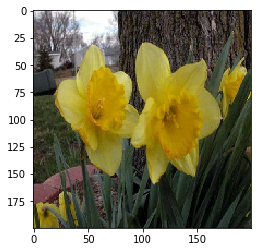

In [54]:
#plt.imshow(img)
#plt.show()
plt.imshow(a)
#plt.show()
#plt.imshow(x_pre[0])
plt.show()

In [9]:
# path to training dataset
train_files = os.listdir(train_path)

# encode the labels
#print("[INFO] encoding labels...")
#le = LabelEncoder()
#le.fit([tl for tl in train_labels])

# variables to hold features and labels
features = [] # store feature data, x
labels   = [] # store label data, y

label = 0
# loop over all the labels in the folder
for i, file in enumerate(train_files):
    img_path = train_path + "/" + file
    if i %10 == 0:
        print(' {}'.format(i), end=',')
    if (i) % 80 == 0 :
        label = label+1
        print('\n file {}, label {}'.format(file, label))
     # if the target size is different size of image loaded image, will be interpolated  
    img = image.load_img(img_path, target_size=image_size) 
    
    x = image.img_to_array(img) # to numpy array
    x = np.expand_dims(x, axis=0) # insert a new dimension at axis=0
    x = preprocess_input(x) # process 4D tensor,
    feature = model.predict(x)
    flat = feature.flatten()
    features.append(flat)
    labels.append(label)
print("[INFO] processed - {}".format(i))
print( "[INFO] completed label - {}".format(label))
print(len(labels))

 0,
 file image_0001.jpg, label 1
 10, 20, 30, 40, 50, 60, 70, 80,
 file image_0081.jpg, label 2
 90, 100, 110, 120, 130, 140, 150, 160,
 file image_0161.jpg, label 3
 170, 180, 190, 200, 210, 220, 230, 240,
 file image_0241.jpg, label 4
 250, 260, 270, 280, 290, 300, 310, 320,
 file image_0321.jpg, label 5
 330, 340, 350, 360, 370, 380, 390, 400,
 file image_0401.jpg, label 6
 410, 420, 430, 440, 450, 460, 470, 480,
 file image_0481.jpg, label 7
 490, 500, 510, 520, 530, 540, 550, 560,
 file image_0561.jpg, label 8
 570, 580, 590, 600, 610, 620, 630, 640,
 file image_0641.jpg, label 9
 650, 660, 670, 680, 690, 700, 710, 720,
 file image_0721.jpg, label 10
 730, 740, 750, 760, 770, 780, 790, 800,
 file image_0801.jpg, label 11
 810, 820, 830, 840, 850, 860, 870, 880,
 file image_0881.jpg, label 12
 890, 900, 910, 920, 930, 940, 950, 960,
 file image_0961.jpg, label 13
 970, 980, 990, 1000, 1010, 1020, 1030, 1040,
 file image_1041.jpg, label 14
 1050, 1060, 1070, 1080, 1090, 1100, 1110,

In [10]:
# encode the labels using LabelEncoder
targetNames = np.unique(labels)
#le = LabelEncoder()
#le_labels = le.fit_transform(labels)
le_labels = np.array(labels)
# get the shape of training labels
print("[STATUS] training labels: {}".format(le_labels))
print("[STATUS] training labels shape: {}".format(le_labels.shape))

# save features and labels
h5f_data = h5py.File(features_path, 'w')
h5f_data.create_dataset('dataset_1', data=np.array(features))

h5f_label = h5py.File(labels_path, 'w')
h5f_label.create_dataset('dataset_1', data=np.array(le_labels))

h5f_data.close()
h5f_label.close()

# save model and weights
model_json = model.to_json()
with open(model_path + str(test_size) + ".json", "w") as json_file:
    json_file.write(model_json)

# save weights
model.save_weights(model_path + str(test_size) + ".h5")
print("[STATUS] saved model and weights to disk..")

print("[STATUS] features and labels saved..")

# end time
#end = time.time()
#print("[STATUS] end time - {}".format(datetime.datetime.now().strftime("%Y-%m-%d %H:%M")))

[STATUS] training labels: [ 1  1  1 ..., 17 17 17]
[STATUS] training labels shape: (1360,)
[STATUS] saved model and weights to disk..
[STATUS] features and labels saved..
